In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

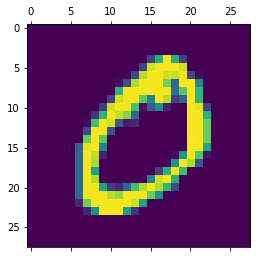

In [6]:
plt.matshow(X_train[1])

In [7]:
y_train[1]

0

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
# scale the data. If not, accuracy is low
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [11]:
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [12]:
#create a simple neural network
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', #categories 1,2,3... sparse because output is integer
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 851us/step - loss: 0.4853 - accuracy: 0.87940s - loss: 0.6650 -  - ETA: 0s - loss: 0.548
Epoch 2/5
1875/1875 [==============================] - 1s 779us/step - loss: 0.3057 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 2s 801us/step - loss: 0.2853 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 2s 856us/step - loss: 0.2743 - accuracy: 0.92360s
Epoch 5/5
1875/1875 [==============================] - 2s 853us/step - loss: 0.2675 - accuracy: 0.9266


In [13]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 584us/step - loss: 0.2692 - accuracy: 0.9239


[0.2692070007324219, 0.9239000082015991]

In [14]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.2570859e-05, 8.6690703e-11, 3.9824048e-05, 8.1518590e-03,
       6.9211899e-07, 9.2271497e-05, 1.4982018e-09, 7.9134893e-01,
       7.4043164e-05, 7.7950954e-04], dtype=float32)

In [15]:
np.argmax(y_predicted[0])

7

In [16]:
y_test[0]

7

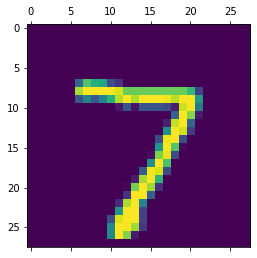

In [17]:
plt.matshow(X_test[0])

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [19]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [20]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    0,    2,    0,    5,    9,    3,    2,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   6,    8,  916,   17,    9,    6,   13,   16,   36,    5],
       [   4,    0,   14,  927,    0,   28,    3,   12,   14,    8],
       [   1,    1,    2,    1,  895,    0,   15,    4,    8,   55],
       [   9,    1,    2,   29,    7,  792,   16,    6,   21,    9],
       [   8,    3,    6,    1,    8,   13,  916,    2,    1,    0],
       [   1,    6,   19,    8,    3,    0,    0,  956,    2,   33],
       [   7,    8,    5,   30,    9,   37,   10,   14,  840,   14],
       [  10,    7,    1,   11,   14,    8,    0,   28,    2,  928]])>

Text(69.0, 0.5, 'Truth')

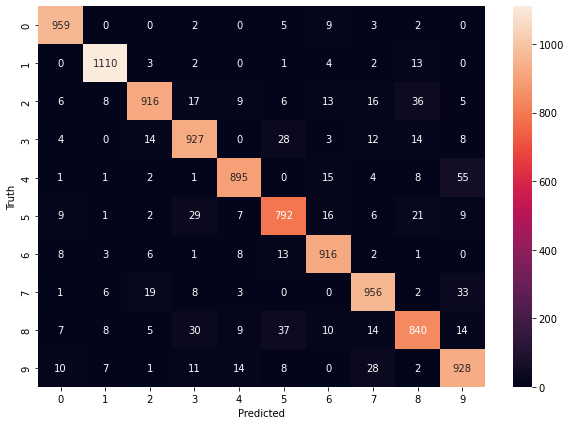

In [21]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
# add a hidden layer (hidden layers usually improve the accuracy)
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', #categories 1,2,3... sparse because output is integer
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2917 - accuracy: 0.9184
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1374 - accuracy: 0.9598
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1001 - accuracy: 0.9704: 0s - loss:
Epoch 4/5
1875/1875 [==============================] - ETA: 0s - loss: 0.0781 - accuracy: 0.97 - 2s 1ms/step - loss: 0.0781 - accuracy: 0.9768
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0643 - accuracy: 0.9805: 0s - loss: 0.0640 - accuracy:  - ETA: 0s - loss: 0.0 - ETA: 0s - loss: 0.0636 - accuracy: 0.


In [23]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 780us/step - loss: 0.0875 - accuracy: 0.9729


[0.08753178268671036, 0.9728999733924866]

Text(69.0, 0.5, 'Truth')

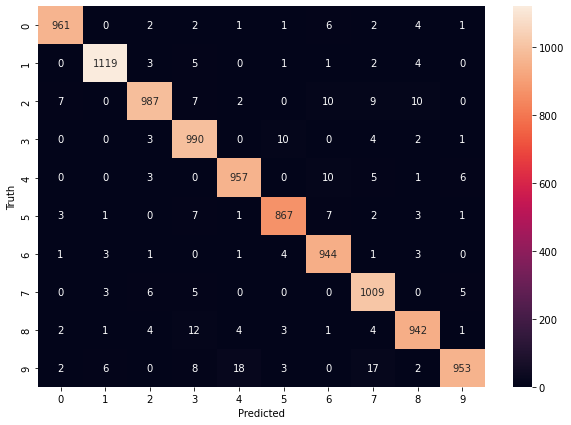

In [24]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
#flattening included in the model layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/',histogram_freq=1)

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy', #categories 1,2,3... sparse because output is integer
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5,callbacks=[tb_callback])

Epoch 1/5
   1/1875 [..............................] - ETA: 0s - loss: 2.3571 - accuracy: 0.0625WARNING:tensorflow:From C:\Users\Akshatha\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8232 - accuracy: 0.7996: 0s - loss: 0
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3614 - accuracy: 0.8990
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3114 - accuracy: 0.9123
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2819 - accuracy: 0.9207
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2590 - accuracy: 0.9274: 0s - loss: 0.2604 - 


In [30]:
%load_ext tensorboard
%tensorboard --logdir logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 2804), started 0:08:07 ago. (Use '!kill 2804' to kill it.)